## <u>Introduction</u>


# Libraries

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import warnings
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
warnings.filterwarnings("ignore")
import os

# 1. Reading and Analysing DataFrame

In [2]:
# Load the dataset
a1 = pd.read_excel("case_study1.xlsx")
a2 = pd.read_excel("case_study2.xlsx")

In [3]:
df1 = a1.copy()
df2 = a2.copy()

In [4]:
df1.head()

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           4         1              0              1                    1   
4           5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            1.000                0.0          1.000   
4                  0            0.000                0.0          0.333   

   pct_closed_tl  ...  CC_TL  Consumer_TL  Gold_TL  Home_TL  PL_TL  \
0          0.800  ...      0            0        1        0      4   
1          0.000  ...      0            1        0        0      0   
2          0.000  ...      0            6        1        0      0   
3          0.000  ...      0            0        0        0      0   
4          0.667  ...      0            0        0        0      0   

   Secured_TL  Unsecured_TL  Other_TL  Age_Oldest_TL  Age_Newest_TL  
0           1             4         0             72             18  
1           0             1         0              7              7  
2           2             6         0             47              2  
3           0             1         1              5              5  
4           3             0         2            131             32  

[5 rows x 26 columns]

In [5]:
df2.head()

PROSPECTID  time_since_recent_payment  time_since_first_deliquency  \
0           1                        549                           35   
1           2                         47                       -99999   
2           3                        302                           11   
3           4                     -99999                       -99999   
4           5                        583                       -99999   

   time_since_recent_deliquency  num_times_delinquent  max_delinquency_level  \
0                            15                    11                     29   
1                        -99999                     0                 -99999   
2                             3                     9                     25   
3                        -99999                     0                 -99999   
4                        -99999                     0                 -99999   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                         29               0                0   
1                          0               0                0   
2                         25               1                9   
3                          0               0                0   
4                          0               0                0   

   num_deliq_6_12mts  ...  pct_CC_enq_L6m_of_L12m  pct_PL_enq_L6m_of_ever  \
0                  0  ...                     0.0                     0.0   
1                  0  ...                     0.0                     0.0   
2                  8  ...                     0.0                     0.0   
3                  0  ...                     0.0                     0.0   
4                  0  ...                     0.0                     0.0   

   pct_CC_enq_L6m_of_ever  max_unsec_exposure_inPct  HL_Flag  GL_Flag  \
0                     0.0                    13.333        1        0   
1                     0.0                     0.860        0        0   
2                     0.0                  5741.667        1        0   
3                     0.0                     9.900        0        0   
4                     0.0                -99999.000        0        0   

   last_prod_enq2  first_prod_enq2  Credit_Score  Approved_Flag  
0              PL               PL           696             P2  
1    ConsumerLoan     ConsumerLoan           685             P2  
2    ConsumerLoan           others           693             P2  
3          others           others           673             P2  
4              AL               AL           753             P1  

[5 rows x 62 columns]

# 2. Data Pre-Processing

## 2.1 Null value Treatment

In [6]:
# Remove nulls
df1 = df1.loc[df1['Age_Oldest_TL'] != -99999]

In [7]:
columns_to_be_removed = []

for i in df2.columns:
    if df2.loc[df2[i] == -99999].shape[0] > 10000:
        columns_to_be_removed .append(i)

In [8]:
columns_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [9]:
df2 = df2.drop(columns_to_be_removed, axis =1)

In [10]:
for i in df2.columns:
    df2 = df2.loc[ df2[i] != -99999 ]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51296 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51296 non-null  int64  
 1   Total_TL              51296 non-null  int64  
 2   Tot_Closed_TL         51296 non-null  int64  
 3   Tot_Active_TL         51296 non-null  int64  
 4   Total_TL_opened_L6M   51296 non-null  int64  
 5   Tot_TL_closed_L6M     51296 non-null  int64  
 6   pct_tl_open_L6M       51296 non-null  float64
 7   pct_tl_closed_L6M     51296 non-null  float64
 8   pct_active_tl         51296 non-null  float64
 9   pct_closed_tl         51296 non-null  float64
 10  Total_TL_opened_L12M  51296 non-null  int64  
 11  Tot_TL_closed_L12M    51296 non-null  int64  
 12  pct_tl_open_L12M      51296 non-null  float64
 13  pct_tl_closed_L12M    51296 non-null  float64
 14  Tot_Missed_Pmnt       51296 non-null  int64  
 15  Auto_TL               51

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42066 entries, 0 to 51335
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42066 non-null  int64  
 1   time_since_recent_payment   42066 non-null  int64  
 2   num_times_delinquent        42066 non-null  int64  
 3   max_recent_level_of_deliq   42066 non-null  int64  
 4   num_deliq_6mts              42066 non-null  int64  
 5   num_deliq_12mts             42066 non-null  int64  
 6   num_deliq_6_12mts           42066 non-null  int64  
 7   num_times_30p_dpd           42066 non-null  int64  
 8   num_times_60p_dpd           42066 non-null  int64  
 9   num_std                     42066 non-null  int64  
 10  num_std_6mts                42066 non-null  int64  
 11  num_std_12mts               42066 non-null  int64  
 12  num_sub                     42066 non-null  int64  
 13  num_sub_6mts                42066 no

## 2.2 Data Concatenate

In [13]:
# Checking common column names
for i in list(df1.columns):
    if i in list(df2.columns):
        print (i)

PROSPECTID


In [14]:
# Merge the two dataframes, inner join so that no nulls are present
df = pd. merge ( df1, df2, how ='inner', left_on = ['PROSPECTID'], right_on = ['PROSPECTID'] )

In [15]:
df.head()

PROSPECTID  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0           1         5              4              1                    0   
1           2         1              0              1                    0   
2           3         8              0              8                    1   
3           5         3              2              1                    0   
4           6         6              5              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            0.000                0.0          0.333   
4                  0            0.000                0.0          0.167   

   pct_closed_tl  ...  pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  \
0          0.800  ...                     0.0                     0.0   
1          0.000  ...                     0.0                     0.0   
2          0.000  ...                     0.0                     0.0   
3          0.667  ...                     0.0                     0.0   
4          0.833  ...                     1.0                     0.0   

   pct_PL_enq_L6m_of_ever  pct_CC_enq_L6m_of_ever  HL_Flag  GL_Flag  \
0                   0.000                     0.0        1        0   
1                   0.000                     0.0        0        0   
2                   0.000                     0.0        1        0   
3                   0.000                     0.0        0        0   
4                   0.429                     0.0        1        0   

   last_prod_enq2  first_prod_enq2  Credit_Score  Approved_Flag  
0              PL               PL           696             P2  
1    ConsumerLoan     ConsumerLoan           685             P2  
2    ConsumerLoan           others           693             P2  
3              AL               AL           753             P1  
4    ConsumerLoan               PL           668             P3  

[5 rows x 79 columns]

In [16]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


## 2.3 Chi-square test

In [17]:
for i in ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    print(i, '---', pval)

MARITALSTATUS --- 3.578180861038862e-233
EDUCATION --- 2.6942265249737532e-30
GENDER --- 1.907936100186563e-05
last_prod_enq2 --- 0.0
first_prod_enq2 --- 7.84997610555419e-287


- Since all the categorical features have pval <=0.05, we will accept all

## 2.4 VIF test

In [18]:
numeric_columns = []
for i in df.columns:
    if df[i].dtype != 'object' and i not in ['PROSPECTID','Approved_Flag']:
        numeric_columns.append(i)

In [19]:
numeric_columns

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [20]:
# VIF sequentially check

vif_data = df[numeric_columns]
total_columns = vif_data.shape[1]
columns_to_be_kept = []
column_index = 0

In [21]:
for i in range (0,total_columns):
    
    vif_value = variance_inflation_factor(vif_data, column_index)
    print (column_index,'---',vif_value)
    
    
    if vif_value <= 6:
        columns_to_be_kept.append( numeric_columns[i] )
        column_index = column_index+1
    
    else:
        vif_data = vif_data.drop([ numeric_columns[i] ] , axis=1)

0 --- inf
0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000327
0 --- 6.520647877790928
0 --- 5.149501618212625
1 --- 2.611111040579735
2 --- inf
2 --- 1788.7926256209232
2 --- 8.601028256477228
2 --- 3.8328007921530785
3 --- 6.099653381646739
3 --- 5.581352009642762
4 --- 1.9855843530987785
5 --- inf
5 --- 4.809538302819343
6 --- 23.270628983464636
6 --- 30.595522588100053
6 --- 4.3843464059655854
7 --- 3.0646584155234238
8 --- 2.898639771299253
9 --- 4.377876915347322
10 --- 2.207853583695844
11 --- 4.916914200506864
12 --- 5.214702030064725
13 --- 3.3861625024231476
14 --- 7.840583309478997
14 --- 5.255034641721438
15 --- inf
15 --- 7.380634506427232
15 --- 1.4210050015175733
16 --- 8.083255010190323
16 --- 1.6241227524040114
17 --- 7.257811920140003
17 --- 15.59624383268298
17 --- 1.825857047132431
18 --- 1.5080839450032664
19 --- 2.172088834824578
20 --- 2.623397553527229
21 --- 2.2959970812106176
22 --- 7.360578319196446
22 --- 2.1602387773102554
23 --- 2.8686288267891467
24

In [22]:
# check Anova for columns_to_be_kept 

from scipy.stats import f_oneway

columns_to_be_kept_numerical = []

for i in columns_to_be_kept:
    a = list(df[i])  
    b = list(df['Approved_Flag'])  
    
    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']


    f_statistic, p_value = f_oneway(group_P1, group_P2, group_P3, group_P4)

    if p_value <= 0.05:
        columns_to_be_kept_numerical.append(i)

In [23]:
columns_to_be_kept_numerical

['pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'Tot_TL_closed_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'CC_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'max_recent_level_of_deliq',
 'num_deliq_6_12mts',
 'num_times_60p_dpd',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_12mts',
 'num_lss',
 'recent_level_of_deliq',
 'CC_enq_L12m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L3m',
 'NETMONTHLYINCOME',
 'Time_With_Curr_Empr',
 'CC_Flag',
 'PL_Flag',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'HL_Flag',
 'GL_Flag']

In [24]:
# listing all the final features
features = columns_to_be_kept_numerical + ['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']
df = df[features + ['Approved_Flag']]

## 2.5 EDA

In [25]:
df.head()

pct_tl_open_L6M  pct_tl_closed_L6M  Tot_TL_closed_L12M  pct_tl_closed_L12M  \
0            0.000                0.0                   0               0.000   
1            0.000                0.0                   0               0.000   
2            0.125                0.0                   0               0.000   
3            0.000                0.0                   0               0.000   
4            0.000                0.0                   1               0.167   

   Tot_Missed_Pmnt  CC_TL  Home_TL  PL_TL  Secured_TL  Unsecured_TL  ...  \
0                0      0        0      4           1             4  ...   
1                0      0        0      0           0             1  ...   
2                1      0        0      0           2             6  ...   
3                0      0        0      0           3             0  ...   
4                0      0        0      0           6             0  ...   

   pct_PL_enq_L6m_of_ever  pct_CC_enq_L6m_of_ever  HL_Flag  GL_Flag  \
0                   0.000                     0.0        1        0   
1                   0.000                     0.0        0        0   
2                   0.000                     0.0        1        0   
3                   0.000                     0.0        0        0   
4                   0.429                     0.0        1        0   

   MARITALSTATUS      EDUCATION  GENDER  last_prod_enq2  first_prod_enq2  \
0        Married           12TH       M              PL               PL   
1         Single       GRADUATE       F    ConsumerLoan     ConsumerLoan   
2        Married            SSC       M    ConsumerLoan           others   
3        Married  POST-GRADUATE       M              AL               AL   
4        Married           12TH       M    ConsumerLoan               PL   

   Approved_Flag  
0             P2  
1             P2  
2             P2  
3             P1  
4             P3  

[5 rows x 43 columns]

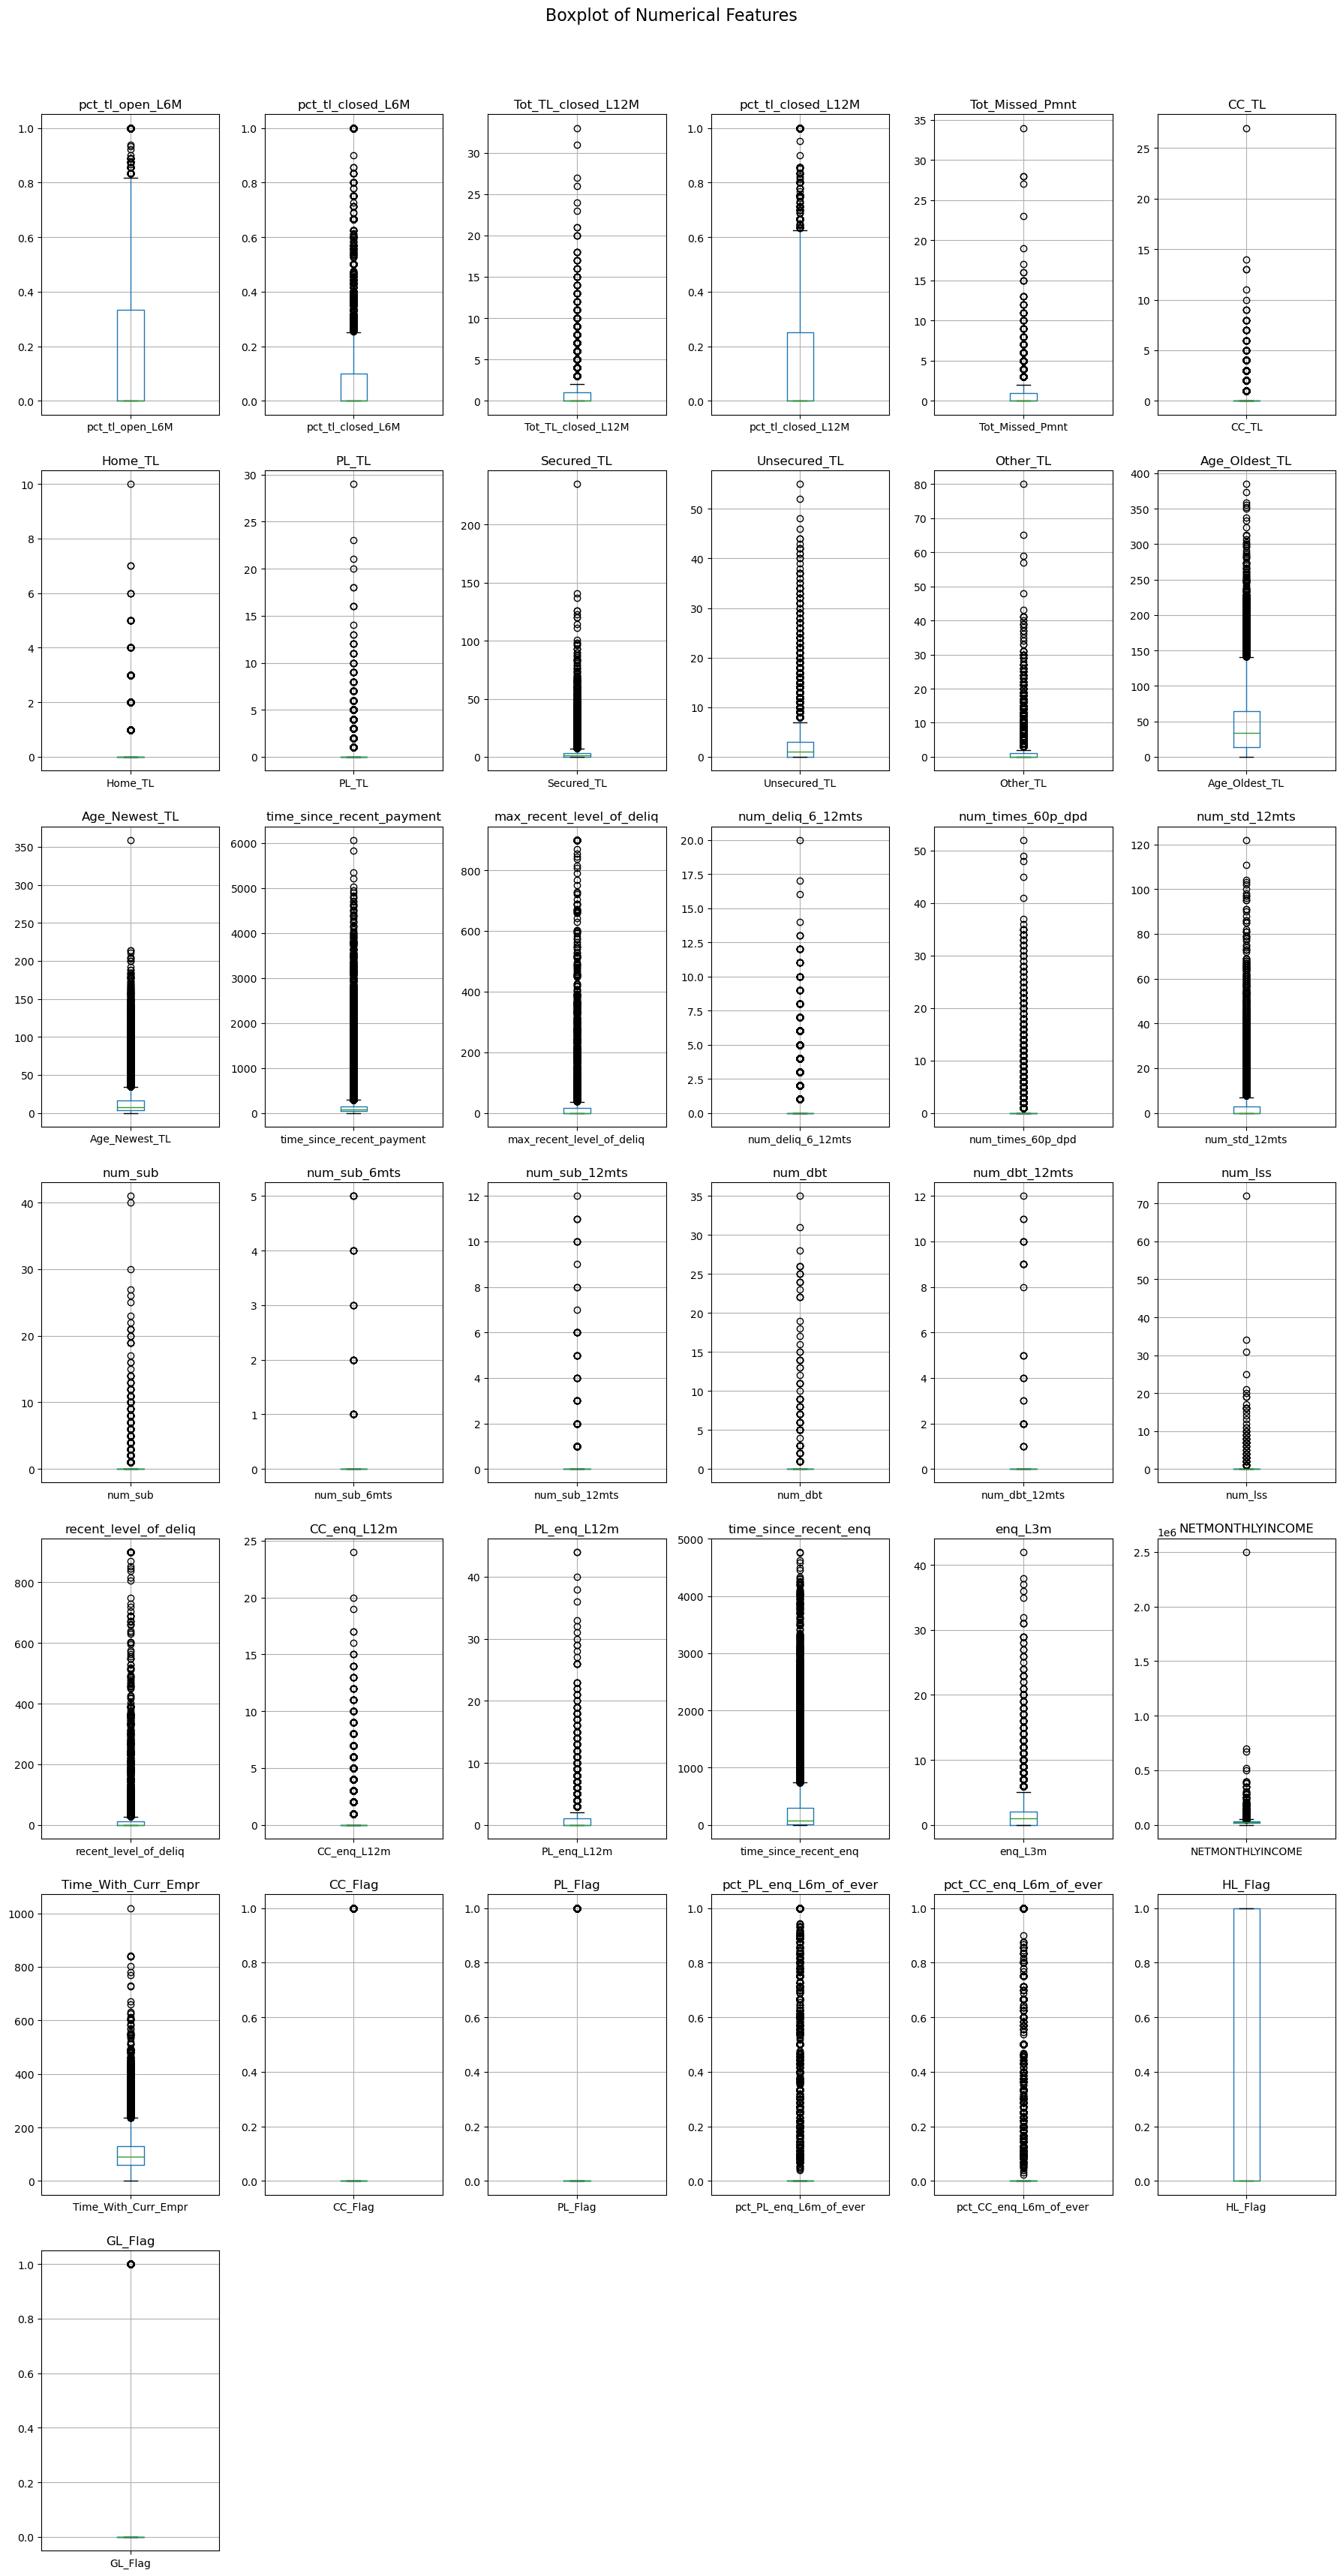

In [26]:
numerical_features = df.select_dtypes(include=['number'])

# Number of numerical features
num_features = len(numerical_features.columns)

# Number of columns in the grid
num_cols = 6
# Number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to handle all features

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot each numerical feature in its corresponding subplot
for i, col in enumerate(numerical_features.columns):
    numerical_features.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Set overall title and adjust layout
plt.suptitle('Boxplot of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit suptitle
plt.show()

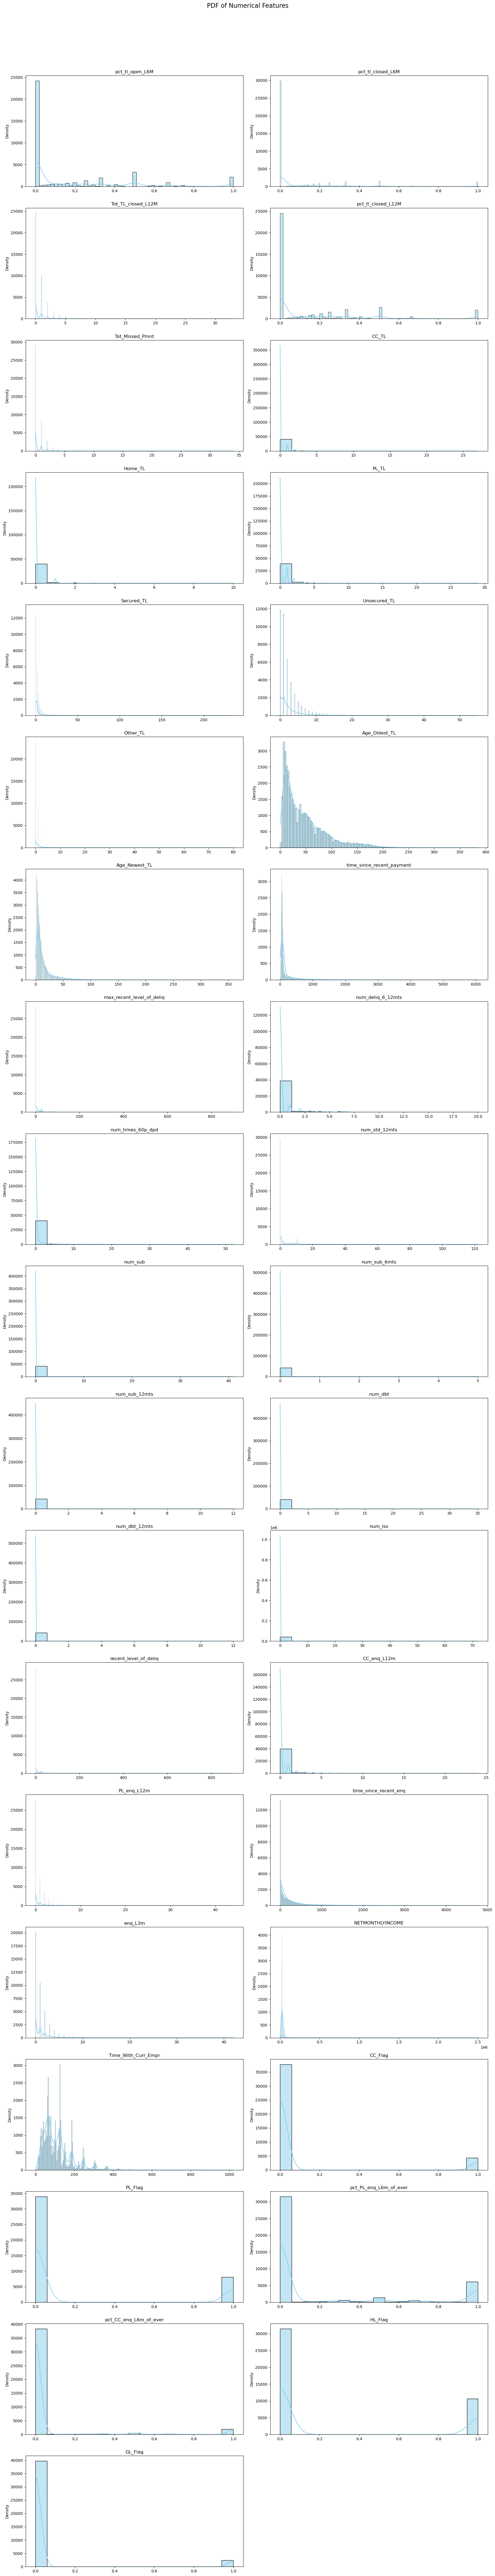

In [29]:
numerical_features = df.select_dtypes(include=['number'])

# Number of numerical features
num_features = len(numerical_features.columns)

# Number of columns in the grid
num_cols = 2
# Number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to handle all features

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot the PDF for each numerical feature
for i, col in enumerate(numerical_features.columns):
    sns.histplot(numerical_features[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Set overall title and adjust layout
plt.suptitle('PDF of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit suptitle
plt.show()

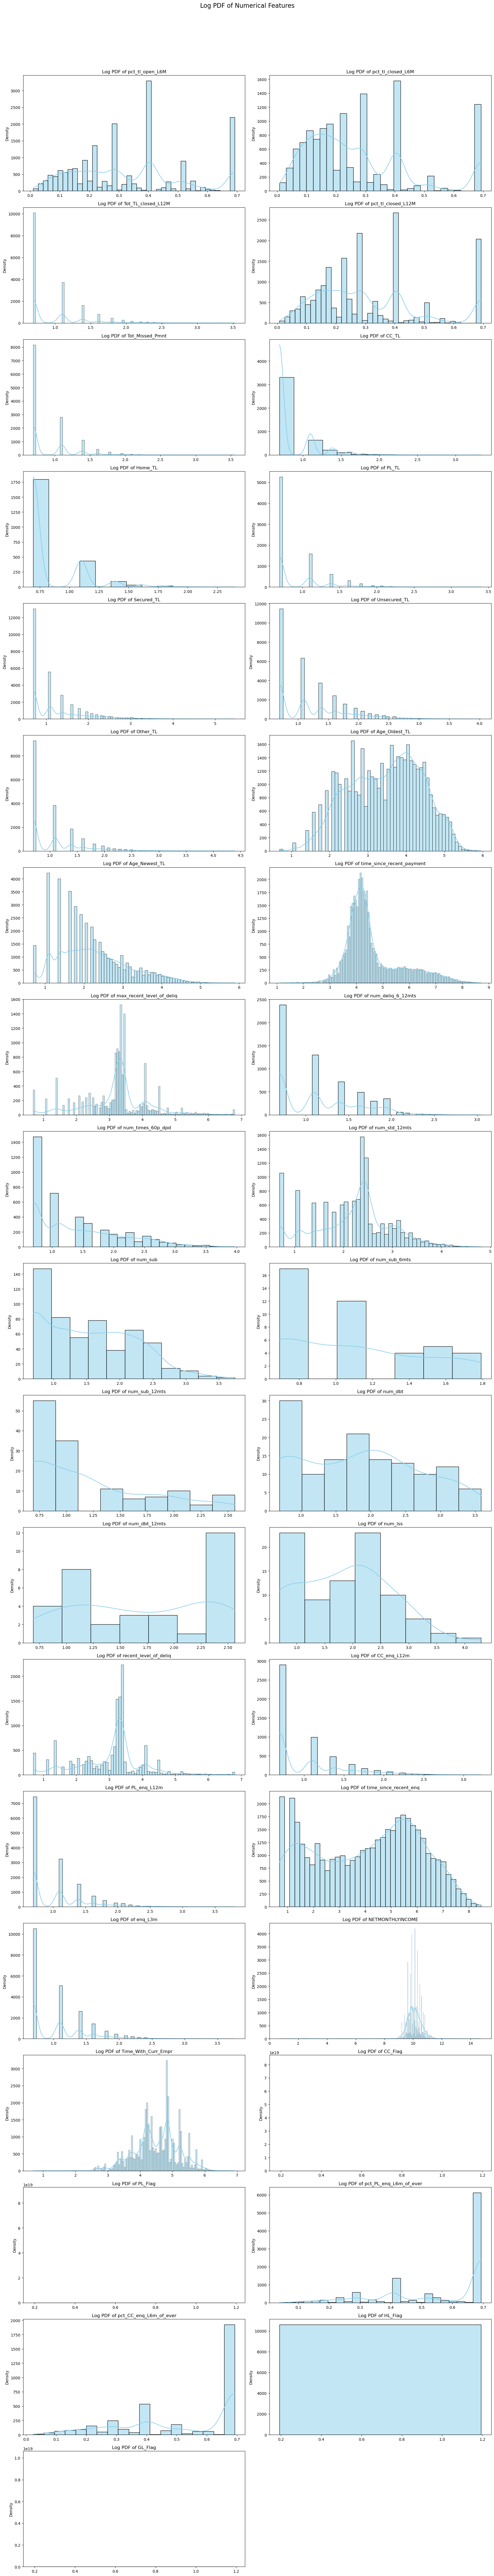

In [30]:
numerical_features = df.select_dtypes(include=['number'])

# Number of numerical features
num_features = len(numerical_features.columns)

# Number of columns in the grid
num_cols = 2
# Number of rows needed
num_rows = (num_features + num_cols - 1) // num_cols  # Ceiling division to handle all features

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()  # Flatten the 2D array of axes to make indexing easier

# Plot the log PDF for each numerical feature
for i, col in enumerate(numerical_features.columns):
    # Avoid log transformation of non-positive values
    data = numerical_features[col].replace(0, np.nan)  # Replace zeros with NaN to avoid log(0)
    log_data = np.log1p(data.dropna())  # log1p(x) = log(1 + x)
    
    sns.histplot(log_data, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Log PDF of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Hide any unused subplots
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Set overall title and adjust layout
plt.suptitle('Log PDF of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to fit suptitle
plt.show()

Feature: pct_tl_open_L6M, Lambda: -0.07335376470389102
Feature: pct_tl_closed_L6M, Lambda: -0.22862454456672318
Feature: Tot_TL_closed_L12M, Lambda: -0.07231228691394044
Feature: pct_tl_closed_L12M, Lambda: -0.08262446049390575
Feature: Tot_Missed_Pmnt, Lambda: -0.17819900020874924
Feature: CC_TL, Lambda: -0.6915178985776963
Feature: Home_TL, Lambda: -1.260533665878653
Feature: PL_TL, Lambda: -0.35317251453238513
Feature: Secured_TL, Lambda: 0.1455555263640785
Feature: Unsecured_TL, Lambda: 0.1658056704989882
Feature: Other_TL, Lambda: -0.0567029565669037
Feature: Age_Oldest_TL, Lambda: 0.1299857439299132
Feature: Age_Newest_TL, Lambda: 0.15672214397529402
Feature: time_since_recent_payment, Lambda: -0.38896411009838455
Feature: max_recent_level_of_deliq, Lambda: -0.1305897253417592
Feature: num_deliq_6_12mts, Lambda: -0.5055535170049521
Feature: num_times_60p_dpd, Lambda: -0.683529561298746
Feature: num_std_12mts, Lambda: -0.1721112376505073
Feature: num_sub, Lambda: -5.15827348458108

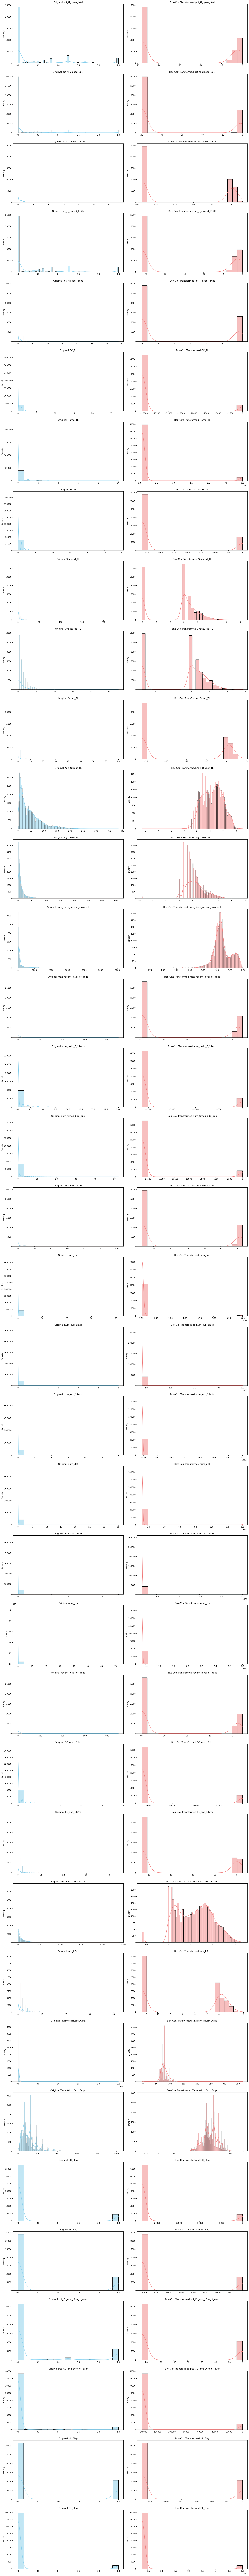

In [33]:
from scipy import stats

numerical_features = df.select_dtypes(include=['number'])

# Initialize a DataFrame to store the transformed data
box_cox_transformed = pd.DataFrame()

# Apply Box-Cox transformation to each numerical feature
lambda_values = {}
for col in numerical_features.columns:
    data = numerical_features[col]
    
    # Box-Cox requires positive values, so we shift data if necessary
    if (data <= 0).any():
        data = data + abs(data.min()) + 1e-6
    
    # Apply Box-Cox transformation
    transformed_data, lambda_ = stats.boxcox(data)
    
    box_cox_transformed[col] = transformed_data
    lambda_values[col] = lambda_
    print(f'Feature: {col}, Lambda: {lambda_}')


num_features = len(numerical_features.columns)
num_cols = 2
num_rows = (num_features * 2 + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten() 

# Plot original and transformed data
for i, col in enumerate(numerical_features.columns):
    # Original data
    sns.histplot(numerical_features[col], kde=True, ax=axes[2 * i], color='skyblue')
    axes[2 * i].set_title(f'Original {col}')
    axes[2 * i].set_xlabel('')
    axes[2 * i].set_ylabel('Density')

    # Transformed data
    sns.histplot(box_cox_transformed[col], kde=True, ax=axes[2 * i + 1], color='lightcoral')
    axes[2 * i + 1].set_title(f'Box-Cox Transformed {col}')
    axes[2 * i + 1].set_xlabel('')
    axes[2 * i + 1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
df[numerical_features.columns] = box_cox_transformed

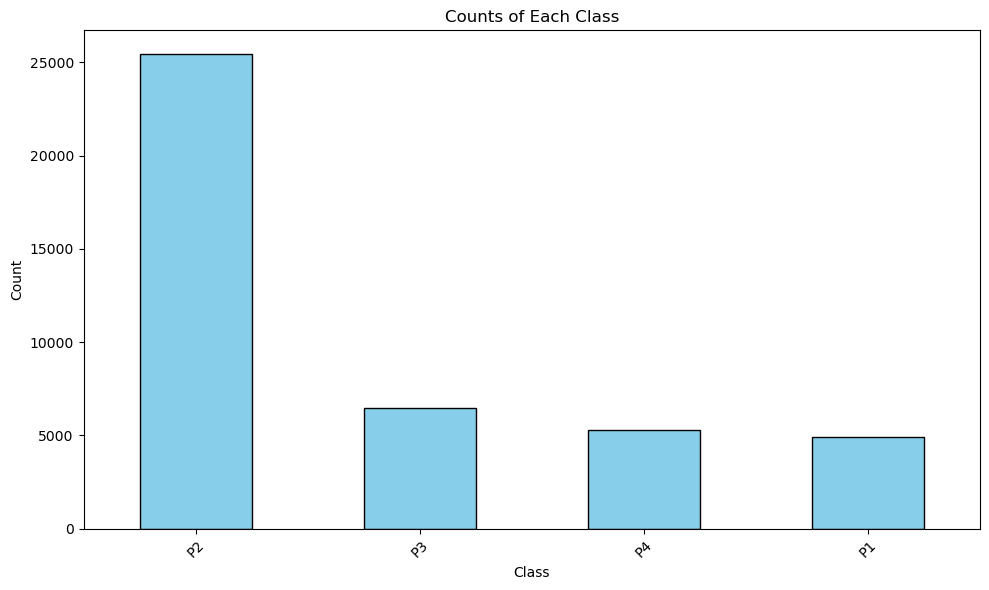

In [68]:
# Count the occurrences of each class
class_counts = df['Approved_Flag'].value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Set title and labels
plt.title('Counts of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

# 3. Model Data Preparation

In [35]:
## Independent and dependent features
X = df.drop(labels=['Approved_Flag'],axis=1)
Y = df[['Approved_Flag']]

In [36]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [37]:
categorical_cols

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2'],
      dtype='object')

In [38]:
numerical_cols

Index(['pct_tl_open_L6M', 'pct_tl_closed_L6M', 'Tot_TL_closed_L12M',
       'pct_tl_closed_L12M', 'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL', 'PL_TL',
       'Secured_TL', 'Unsecured_TL', 'Other_TL', 'Age_Oldest_TL',
       'Age_Newest_TL', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'CC_enq_L12m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L3m', 'NETMONTHLYINCOME',
       'Time_With_Curr_Empr', 'CC_Flag', 'PL_Flag', 'pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever', 'HL_Flag', 'GL_Flag'],
      dtype='object')

In [39]:
# Separate education for ordinal encoding
education_col = ['EDUCATION']
other_cat_cols = [col for col in categorical_cols if col != 'EDUCATION']

In [40]:
education_order = {
    'SSC': 1,
    '12TH': 2,
    'GRADUATE': 3,
    'UNDER GRADUATE': 3,
    'POST-GRADUATE': 4,
    'OTHERS': 1,
    'PROFESSIONAL': 3
}

# You can use this dictionary in your preprocessing pipeline

In [41]:
# Create an OrdinalEncoder object
oe = OrdinalEncoder(categories=[['P4', 'P3', 'P2', 'P1']], dtype=int)

# Fit the encoder on Y and transform Y
Y = oe.fit_transform(Y[['Approved_Flag']])

In [42]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ]
)

# Education Pipeline (Ordinal Encoding with specific order)
education_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder(categories=[list(education_order.keys())], dtype=int))
    ]
)

# Other Categorical Pipeline (One-Hot Encoding)
cat_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)),
    ]
)

# Correct the ColumnTransformer setup
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, list(numerical_cols)),
    ('education_pipeline', education_pipeline, education_col),  # Changed from education_order to education_col
    ('cat_pipeline', cat_pipeline, list(other_cat_cols))
])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['pct_tl_open_L6M', 'pct_tl_closed_L6M',
                                  'Tot_TL_closed_L12M', 'pct_tl_closed_L12M',
                                  'Tot_Missed_Pmnt', 'CC_TL', 'Home_TL',
                                  'PL_TL', 'Secured_TL', 'Unsecured_TL',
                                  'Other_TL', 'Age_Oldest_TL', 'Age_Newest_TL',
                                  'time_since_rec...
                                                  OrdinalEncoder(categories=[['SSC',
                                                                              '12TH',
                                                                              'GRADUATE',
                                                                              'UNDER '
                                                                              'GRADUATE',
                                                                              'POST-GRADUATE',
                                                                              'OTHERS',
                                                                              'PROFESSIONAL']],
                                                                 dtype=<class 'int'>))]),
                                 ['EDUCATION']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['MARITALSTATUS', 'GENDER', 'last_prod_enq2',
                                  'first_prod_enq2'])])

In [44]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [45]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Fit SMOTE on the training data and transform it
X_train, y_train = smote.fit_resample(X_train, y_train)

In [71]:
X_train.head()

num_pipeline__pct_tl_open_L6M  num_pipeline__pct_tl_closed_L6M  \
0                      -0.860331                        -0.635307   
1                       0.918797                        -0.635307   
2                      -0.860331                        -0.635307   
3                      -0.860331                         1.507581   
4                       1.266937                         1.563331   

   num_pipeline__Tot_TL_closed_L12M  num_pipeline__pct_tl_closed_L12M  \
0                         -0.841957                         -0.841513   
1                         -0.841957                         -0.841513   
2                         -0.841957                         -0.841513   
3                          1.150147                          0.993588   
4                          1.150147                          1.133880   

   num_pipeline__Tot_Missed_Pmnt  num_pipeline__CC_TL  num_pipeline__Home_TL  \
0                      -0.669632            -0.337319              -0.243102   
1                      -0.669632            -0.337319              -0.243102   
2                      -0.669632            -0.337319              -0.243102   
3                      -0.669632             2.964721               4.113499   
4                       1.481588            -0.337319              -0.243102   

   num_pipeline__PL_TL  num_pipeline__Secured_TL  num_pipeline__Unsecured_TL  \
0            -0.490013                 -1.484257                    0.290654   
1            -0.490013                  1.660353                    0.290654   
2            -0.490013                 -1.484257                    0.290654   
3             2.048432                  0.685296                    1.621583   
4             2.043010                  0.685296                    0.695619   

   ...  cat_pipeline__last_prod_enq2_CC  \
0  ...                              0.0   
1  ...                              0.0   
2  ...                              0.0   
3  ...                              0.0   
4  ...                              0.0   

   cat_pipeline__last_prod_enq2_ConsumerLoan  cat_pipeline__last_prod_enq2_HL  \
0                                        0.0                              0.0   
1                                        1.0                              0.0   
2                                        1.0                              0.0   
3                                        0.0                              0.0   
4                                        0.0                              0.0   

   cat_pipeline__last_prod_enq2_PL  cat_pipeline__last_prod_enq2_others  \
0                              0.0                                  0.0   
1                              0.0                                  0.0   
2                              0.0                                  0.0   
3                              0.0                                  1.0   
4                              1.0                                  0.0   

   cat_pipeline__first_prod_enq2_CC  \
0                               0.0   
1                               0.0   
2                               0.0   
3                               1.0   
4                               0.0   

   cat_pipeline__first_prod_enq2_ConsumerLoan  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   

   cat_pipeline__first_prod_enq2_HL  cat_pipeline__first_prod_enq2_PL  \
0                               0.0                               0.0   
1                               0.0                               0.0   
2                               0.0                               0.0   
3                               0.0                               0.0   
4                               0.0                               0.0   

   cat_pipeline__firs

# 4. Model Building

In [72]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SupportVectorClassifier':SVC(),
    'NaiveBayes':GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostRegressor':AdaBoostClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [73]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    return acc

In [74]:
trained_model_list=[]
model_list=[]
acc=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    accuracy=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy score",accuracy)

    acc.append(accuracy)
    
    print('='*35)
    print('\n')
best_model_index = acc.index(max(acc))
best_model_name = model_list[best_model_index]
best_model = list(models.values())[best_model_index]

print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {max(acc)}")

LogisticRegression
Model Training Performance
Accuracy score 0.6419968304278922


DecisionTreeClassifier
Model Training Performance
Accuracy score 0.6695721077654516


SupportVectorClassifier
Model Training Performance
Accuracy score 0.6626782884310618


NaiveBayes
Model Training Performance
Accuracy score 0.4576862123613312


RandomForestClassifier
Model Training Performance
Accuracy score 0.750554675118859


AdaBoostRegressor
Model Training Performance
Accuracy score 0.6875594294770206


XGBClassifier
Model Training Performance
Accuracy score 0.769175911251981


Best Model: XGBClassifier
Best Accuracy: 0.769175911251981


In [75]:
# Initialize the classifier
classifier = XGBClassifier(random_state=42)

In [76]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2]
}

In [77]:
# Set up the grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

# Fit the grid search
grid_search.fit(X_train, y_train.ravel())

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.661 total time=   1.0s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.698 total time=   0.9s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.707 total time=   0.9s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.680 total time=   2.0s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.729 total time=   1.9s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.739 total time=   1.9s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300;, score=0.694 total time=   2.9s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=3, min_chi

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.777 total time=   0.6s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=100;, score=0.784 total time=   0.7s
[CV 1/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.775 total time=   1.4s
[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.779 total time=   1.4s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=200;, score=0.782 total time=   1.4s
[CV 1/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300;, score=0.774 total time=   2.0s
[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300;, score=0.777 total time=   2.1s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3, n_estimators=300;, score=0.779 total time=

[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.775 total time=   1.6s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=200;, score=0.779 total time=   1.6s
[CV 1/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.767 total time=   1.9s
[CV 2/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.775 total time=   1.9s
[CV 3/3] END gamma=0.2, learning_rate=0.3, max_depth=7, min_child_weight=5, n_estimators=300;, score=0.779 total time=   2.3s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [78]:
grid_search.best_params_

{'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 300}

In [79]:
# Initialize the XGBoost classifier with the best parameters you found
xgb_classifier = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    gamma=0.2,
    min_child_weight=3,
    random_state=42  # For reproducibility
)

In [80]:
# Fit the classifier
xgb_classifier.fit(X_train, y_train.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [81]:
y_pred = xgb_classifier.predict(X_test)

In [82]:
# Evaluate the model
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7708399366085579

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1559
           1       0.47      0.32      0.38      2008
           2       0.83      0.89      0.86      7643
           3       0.75      0.83      0.79      1410

    accuracy                           0.77     12620
   macro avg       0.70      0.69      0.69     12620
weighted avg       0.75      0.77      0.76     12620



<Figure size 3000x1500 with 0 Axes>

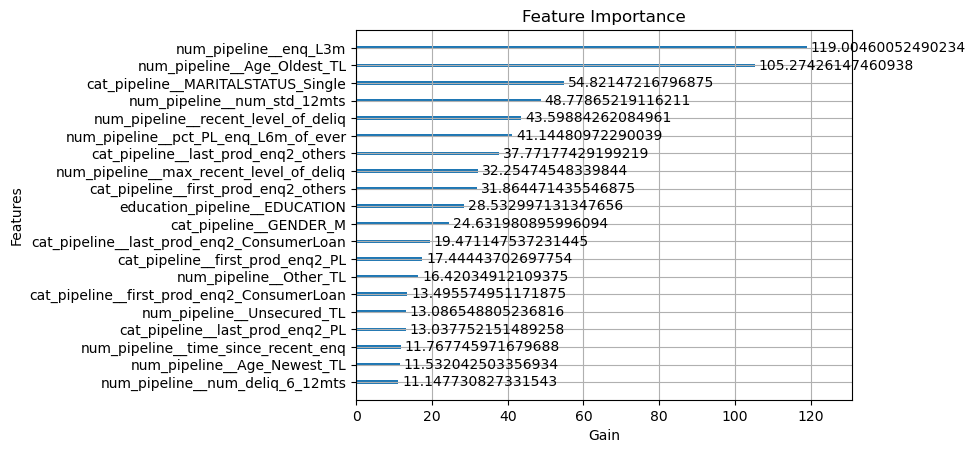

In [83]:
plt.figure(figsize=(30, 15))  # Adjust the width and height as needed

# Plot feature importance with the 'gain' metric
xgb.plot_importance(xgb_classifier, importance_type='gain', max_num_features=20, title='Feature Importance', xlabel='Gain', ylabel='Features')

# Display the plot
plt.show()

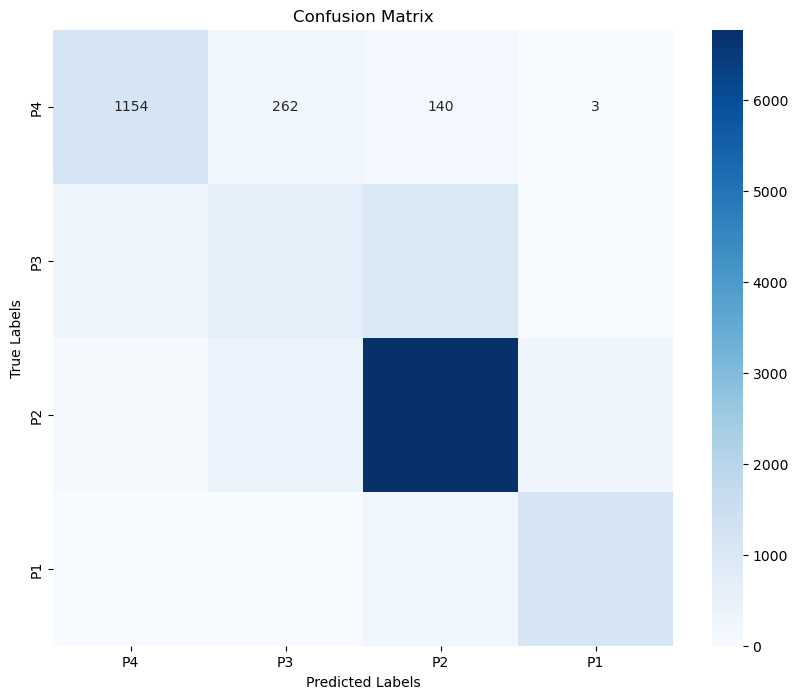

In [84]:
# Assuming you've already made predictions
cm = confusion_matrix(y_test, y_pred)

# Define the labels
labels = ['P4', 'P3', 'P2', 'P1']  # Note: The order is reversed because 0 corresponds to P4, 1 to P3, etc.

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()